# Project 2 - Brandon Yip 

## Scientific Question: How structurally similar are the surface proteins of SARS-CoV-2 and influenza type A subtype H1N1?

SARS-CoV-2 binds to receptors on host cells through the use of spike (S) glycoprotein found on its surface (Javier et al. 2020). Influenza type A subtype H1N1 binds to receptors on host cells through two surface proteins, haemagglutinin (HA) and neuraminidase (NA) (Manzanares-Meza et al. 2020).

Both viruses are known to exhibit high transmissibility among humans and are both contagious, respiratory illnesses with similar symptoms (Abdelrahman et al. 2020). 

The protein sequences for HA (https://www.ncbi.nlm.nih.gov/protein/BAA01280.1?report=fasta) and NA (https://www.ncbi.nlm.nih.gov/protein/ADC45738.1?report=fasta) were both found on the NCBI database. NCBI is the National Center of Biotechnology Information and, according to their website, "advances science and health by providing access to biomedical and genomic information" The protein sequence for S was found on the Uniprot Knowledgebase database (https://www.uniprot.org/uniprot/P0DTC2). Uniprot is the Universal Protein Resource and, according to their website, "is a comprehensive resource for protein sequence and annotation data."

## Scientific Hypothesis: If SARS-CoV-2 binds through a spike (S) glycoprotein and influenza type A subtype H1N1 binds through two surface proteins, the glycoprotein haemagglutinin (HA) and the enzyme neuraminidase (NA), then we expect to see little similarity between the protein sequences of the surface proteins of SARS-CoV-2 and influenza type A subtype H1N1.

The spike (S) glycoprotein of SARS-CoV-2 has been at the focus of recent scientific research as scientists worldwide are attempting to better understand the virus as every individual is affected by the onset of the COVID-19 pandemic. This is seen through the work of Javier et al. in how specific components of S, its S1 and S2 loop, were brought to light and determined to be a potential key component in COVID-19's high transmissability and stability (Javier et. al 2020). As for influenza, whose origin is rooted in the "Spanish Flu" of 1918 (Abdelrahman et al. 2020), studies on its surface proteins, NA and HA, are much more abdundant. Specifically, HA and NA are known to work in tandem, where NA works to cleave the sialic acid on a host cell so that HA could bind to the newly open receptors (Abdelrahman et al. 2020). 

SARS-CoV-2 and influenza A both cause infected patients to present with the symptoms of a "cough, fever, severe lung infections, and occasional respiratory failure causing deaths" (Abdelrahman et al. 2021). Given the similarity in symptoms caused, it may be expected that the makeup of the binding proteins of both viruses are similar. To answer my scientific question and hypothesis, I looked to take studied protein sequences for each protein and compare them using pairwise sequence alignment and multiple sequence alignment. The protein sequences were downloaded as individual FASTA files and subsequently merged into one FASTA file using Jupyter notebook for Biopython to load and process the alignments here.

## Part 1: Load the packages
Packages loaded include the following:

Biopython: Biopython is an open-source collection of tools in Python. It is used to conduct bioinformatics methods and other biological computation. It can both read and write multiple file types and can access online databases. In this project, it has been used to conduct pairwise sequence alignment and multiple sequence alignment. To learn more about Biopython and its usage, see: https://biopython.org/wiki/Documentation.

NumPy: NumPy is an open-source library used in Python for creating arrays and matrices. It allows for high-level mathematical computation. It is largely used in array operations. NumPy and Matplotlib are often used in tandem to simulate an environment that is similar to Matlab. This combination is favored because of its open-source nature. To learn more about NumPy, see: https://numpy.org/doc/.

Seaborn: Seaborn is an open-source Python data visualization library that is built on top of Matplotlib. It allows for stylish statistical plotting. Its plotting functions focus on dataframes and entire datasets to produc its plots. Its purpose is rooted in allowing easy and intuitive data plotting. To learn more about NumPy, see: https://seaborn.pydata.org/.

Matplotlib: Matplotlib is an open-source plotting library used in Python. It is used for embedding plots into appications. It serves a base for other packages such as Seaborn. It is also often used in tandem with NumPy to simulate an environment that is similar to MatLab. This combination is favored because of its open-source nature. To learn more about Matplotlib, see: https://matplotlib.org/stable/.

In [154]:
#Package already obtained through Anaconda Navigator, running shows installation already completed.
#pip install Biopython

In [155]:
#Package already obtained through Anaconda Navigator, running shows installation already completed.
#pip install numpy

In [156]:
#Package already obtained through Anaconda Navigator, running shows installation already completed.
#pip install seaborn

In [157]:
#Package already obtained through Anaconda Navigator, running shows installation already completed.
#pip install matplotlib

In [158]:
from Bio import AlignIO
from Bio import pairwise2
from Bio import Seq
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import MuscleCommandline
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns

## Part 2: Load in the data and perform Bioinformatics Analyses
For our purposes, we are using a FASTA file containing the proteins sequences of HA, NA, and S. A FASTA file is a text-based format used to store either nucleotide or amino acid sequences in a string of single-letter codes. In these files, information pertaining to the sequence is found in a line just before the sequences.

In the code below, we are working to load and print each sequence found in our FASTA file containing the sequences for HA, NA, and S. 
Next, we run pairwise sequence alignments to compare HA with NA, HA with S, and NA with S and print. The score printed is indicative of matching proteins with higher values indicating greater matches. Pairwise sequence alignment takes two protein sequences and compares them to find the number of matching amino acid bases.

Next, we load our original FASTA file, which is unaligned, into MUSCLE to obtain an aligned file which we can then use for multiple sequence alignment (MSA). Multiple sequence alignment conducts a similar job to pairwise sequence alignment but is capable of performing its alignment on more than just the two protein sequences able to be processed at a time through pairwise sequence alignment. MUSCLE was unable to be used in this scenario, however, so an MSA file was obtained using an online tool and the particular job used in this project could be found here: https://www.ebi.ac.uk/Tools/services/web/toolresult.ebi?jobId=muscle-I20211208-061615-0558-22822573-p1m

Once our MSA is obtained, we use Biopython to load the aligned file to run a multiple sequence alignment then print.


In [169]:
#print name and sequence for every sequence in fasta file
for seq_record in SeqIO.parse('Project2_ProteinSequences.fasta','fasta'):
    #print sequence identifier
    print(repr(seq_record.id))
    #print protein sequence
    print(repr(seq_record.seq))

'BAA01280.1'
Seq('MEAKLFVLFCTFTVLKADTICVGYHANNSTDTVDTVLEKNVTVTHSVNLLEDSH...ICI')
'ADC45738.1'
Seq('MNPNQKIITIGSISIAIGIISLMLQIGNIISIWASHSIQTGSQNNTGICNQRII...IDK')
'sp|P0DTC2|SPIKE_SARS2'
Seq('MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDL...HYT')


In [160]:
#read fasta file containing protein sequences and store in a list
Fasta = list(SeqIO.parse("Project2_ProteinSequences.fasta", "fasta"))
#define global variable size to number of sequences in fasta file for heatmap dimensions
size = len(Fasta)

i = 0
j = 0

#predefine array for alignment scores
alignments_score = np.empty(shape=(size,size))

In [161]:
#alignment score for haemagglutinin and neuraminidase
print(align_array[0][1])

187.0


In [162]:
#alignment score for haemagglutinin and spike protein S (highest similarity (largest number))
print(align_array[0][2])

312.0


In [163]:
#alignment score for neuraminidase and spike protein S
print(align_array[1][2])

268.0


In [164]:
#The following code was unable to be run. An MSA file was generated using an online tool and
#can be found here: https://www.ebi.ac.uk/Tools/services/web/toolresult.ebi?jobId=muscle-I20211208-061615-0558-22822573-p1m
#use MUSCLE to generate MSA file from unaligned fasta file
#read muscle.exe
muscle_exe = r"muscle.exe"
#read unaligned input file
input_file = r"Project2_ProteinSequences.fasta"
#write aligned output file
output_file = r"aligned.fasta"
#run muscle through Biopython
muscle_cline = MuscleCommandline(muscle_exe, input=input_file, out=output_file)
print(muscle_cline)

muscle.exe -in Project2_ProteinSequences.fasta -out aligned.fasta


In [165]:
#Load and read alignment file
alignment = AlignIO.read(open("aligned.fasta"), "fasta")
#print alignment length
print("Total alignment length is %i" % alignment.get_alignment_length())
#print each row in record as well as record identifier
for record in alignment:
    print(record.seq + " " + record.id)

Total alignment length is 1284
------------MEAKLFVLFCTFTVLKADTICVGYH---------ANNSTDTVDTVLEKNVTVTHSVNLLEDSHNGKLCSLNGIAPLQLGKC------------NVAGWLLG---NPECDLLLTANS--------------------------------WSYIIETSNSENGT------------CYPGEFIDYEELR------------------------------EQLSSI----------SSFEKFEIFPKAS---------------------SWPNHETTKGVTAA------------------------------------------------CSYSG------------------------ASSFYRNLLWITK----------KGTSYPKLSKSYTNNKGKEVLVLWGVHHPPSVSEQQSLYQNADAYVSVGSS---------------------------KYNRRFAPEI--AARPEVRGQAGRMNYYWTLLDQG----------------------------------------DTITFEATGNLIA-----------PWYAFALNKG----------------SDSGIITSDAPVHNCDTRCQ----------------TPH--------------------------GALNSSLPFQNVHPITIGECPKY-VKSTKLRMATGL------------------------RNVPSIQSRGL---------------------------------FGAIAGFIEGGWTGM-----------------------IDGWYGYHHQNEQGSGYAADQKSTQNAI---------DGITSKVNSVIEKMNTQFTAVGKEFNNLERRIENLNKKVDDG---------FLDVWTYNAELLVLLENERTLDFH------------------DSNVRNLYEKVKSQLRNNAKEIG-------------

In [166]:
#use Biopython to read aligned fasta file
for record in SeqIO.parse('aligned.fasta', format='fasta'):
    records.append(record)
#execute multiple sequence alignment
align = MultipleSeqAlignment(records)
#print alignment
print(align)

Alignment with 30 rows and 1284 columns
------------MEAKLFVLFCTFTVLKADTICVGYH-------...--- BAA01280.1
-----------------MNPNQKIITIGSISIAIGII-------...--- ADC45738.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT sp|P0DTC2|SPIKE_SARS2
------------MEAKLFVLFCTFTVLKADTICVGYH-------...--- BAA01280.1
-----------------MNPNQKIITIGSISIAIGII-------...--- ADC45738.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT sp|P0DTC2|SPIKE_SARS2
------------MEAKLFVLFCTFTVLKADTICVGYH-------...--- BAA01280.1
-----------------MNPNQKIITIGSISIAIGII-------...--- ADC45738.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT sp|P0DTC2|SPIKE_SARS2
------------MEAKLFVLFCTFTVLKADTICVGYH-------...--- BAA01280.1
-----------------MNPNQKIITIGSISIAIGII-------...--- ADC45738.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...HYT sp|P0DTC2|SPIKE_SARS2
------------MEAKLFVLFCTFTVLKADTICVGYH-------...--- BAA01280.1
-----------------MNPNQKIITIGSISIAIGII-------...--- ADC45738.1
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFR...H

## Part 3: Create a heatmap to display pairwise sequence alignment scores between the sequences of HA, NA, and S.
A heatmap is a plotting method that features a range of colors that are indicative of different results. For this heatmap, pairwise sequence alignment scores going from low to high follow a transition from dark colors to light colors. The scores, and subsequently colors, show similarities between the proteins in terms of matching proteins found in the respective sequences. 

Completed 0
Completed 1
Completed 2


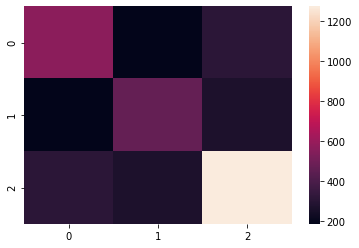

In [168]:
#create an array of values set to zero which will populate heatmap for displaying alignment scores
#for dimensions of array, use size defined above
align_array = np.zeros((size,size))
i = 0
j = 0

#cycle through sequences
for seq1 in SeqIO.parse('Project2_ProteinSequences.fasta', 'fasta'):
    j = 0
    #print a completion confirmation for each pairwise sequence alignment done
    print("Completed " + str(i))
    #for each sequence, calculate alignment score using pairwise sequence alignment for every sequence in fasta file
    for seq2 in SeqIO.parse('Project2_ProteinSequences.fasta','fasta'):
        alignment = pairwise2.align.globalxx(seq1.seq,seq2.seq)
        #print alignment commented out as output is extensive
        #print(alignment)
        align_array[i][j] = alignment[0][2]
        j += 1

    i += 1
#create heatmap using seaborn
heatmap = sns.heatmap(align_array)
#display heatmap
plt.show()

## Part 4: Analysis of the results
The heatmap above displays the similarities between all proteins within in the set (HA, NA, and S). The light colors shown are found in the diagonal as each of the three light-colored squares are scores obtained from comparing a protein with itself. We can observe that all of the proteins are largely unique from one another as the only light colors in the plot are belonging to pairwise sequence alignments done to a particular protein against itself. This is verified by looking at the data from the pairwise sequence alignments done which give a score of 187 for haemagglutinin and neuraminidase, a score of 312 for haemagglutinin and spike protein S, and a score of 268 for neuraminidase and spike protein S. Looking at this, it may appear perplexing that the two surface proteins of influenza A, HA and NA, are dissimilar to one another. A potential reason for this may be rooted in the type of protein HA and NA are. HA is a glycoprotein while NA is an enzyme. This potential reason is further supported by the highest similarity score found of 312 between HA and S as both HA and S are glycoproteins. Additionally, the multiple sequence alignment performed on all three protein sequences shows extreme dissimilarity with the output presenting few matching amino acids. The data found suggests that my hypothesis was correct in that the two surface proteins, HA and NA, of influenza are dissimilar to the surface protein, S, of SARS-CoV-2.